In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [ ]:
data_path = '../data/HAADF1.h5'

file_size_bytes = os.path.getsize(data_path)
file_size_mb = file_size_bytes / (1024 * 1024)
print(f"File: HAADF1.h5")
print(f"Size: {file_size_bytes:,} bytes ({file_size_mb:.2f} MB)")

with h5py.File(data_path, 'r') as f:
    print("\n" + "="*70)
    print("HDF5 FILE STRUCTURE")
    print("="*70)
    
    def print_structure(name, obj):
        """Recursively print HDF5 structure"""
        indent = '  ' * name.count('/')
        if isinstance(obj, h5py.Dataset):
            print(f"{indent}📊 Dataset: {name}")
            print(f"{indent}   Shape: {obj.shape}, Dtype: {obj.dtype}, Size: {obj.size}")
            if obj.size <= 10:
                print(f"{indent}   Data: {obj[()]}")
        elif isinstance(obj, h5py.Group):
            print(f"{indent}📁 Group: {name}")
    
    f.visititems(print_structure)
    
    top_level_keys = list(f.keys())
    print("\n" + "="*70)
    print(f"TOP-LEVEL STRUCTURE: {len(top_level_keys)} groups/datasets")
    print("="*70)
    for key in top_level_keys:
        print(f"  - {key}")

File: HAADF2.h5
Size: 8,569,176 bytes (8.17 MB)

HDF5 FILE STRUCTURE
📁 Group: Measurement_000
  📁 Group: Measurement_000/Channel_000
    📁 Group: Measurement_000/Channel_000/HAADF
      📊 Dataset: Measurement_000/Channel_000/HAADF/HAADF
         Shape: (2048, 2048), Dtype: uint16, Size: 4194304
      📁 Group: Measurement_000/Channel_000/HAADF/metadata
        📁 Group: Measurement_000/Channel_000/HAADF/metadata/experiment
          📁 Group: Measurement_000/Channel_000/HAADF/metadata/experiment/stage
            📁 Group: Measurement_000/Channel_000/HAADF/metadata/experiment/stage/position
            📁 Group: Measurement_000/Channel_000/HAADF/metadata/experiment/stage/tilt
      📁 Group: Measurement_000/Channel_000/HAADF/original_metadata
        📁 Group: Measurement_000/Channel_000/HAADF/original_metadata/Acquisition
          📁 Group: Measurement_000/Channel_000/HAADF/original_metadata/Acquisition/AcquisitionDatetime
          📁 Group: Measurement_000/Channel_000/HAADF/original_metadat

In [6]:
with h5py.File(data_path, 'r') as f:
    all_datasets = []
    all_groups = []
    image_datasets = []
    
    def collect_items(name, obj):
        if isinstance(obj, h5py.Dataset):
            all_datasets.append(name)
            if len(obj.shape) == 2 and obj.shape[0] > 100 and obj.shape[1] > 100:
                image_datasets.append((name, obj.shape, obj.dtype))
        elif isinstance(obj, h5py.Group):
            all_groups.append(name)
    
    f.visititems(collect_items)
    
    print("\n" + "="*70)
    print("DATA SUMMARY")
    print("="*70)
    print(f"Total groups: {len(all_groups)}")
    print(f"Total datasets: {len(all_datasets)}")
    print(f"Potential image datasets (2D, >100x100): {len(image_datasets)}")
    
    print("\n" + "="*70)
    print("IMAGE DATASETS FOUND")
    print("="*70)
    for name, shape, dtype in image_datasets[:20]:
        print(f"  {name}")
        print(f"    Shape: {shape}, Dtype: {dtype}")
    
    if len(image_datasets) > 20:
        print(f"\n  ... and {len(image_datasets) - 20} more image datasets")
    
    measurement_groups = [k for k in f.keys() if 'Measurement' in k or 'measurement' in k]
    print(f"\n" + "="*70)
    print(f"Measurement-like groups: {len(measurement_groups)}")
    print("="*70)
    if measurement_groups:
        for mg in measurement_groups[:10]:
            print(f"  - {mg}")
    else:
        print("  No 'Measurement' groups found - different structure than time series data")


DATA SUMMARY
Total groups: 120
Total datasets: 3
Potential image datasets (2D, >100x100): 1

IMAGE DATASETS FOUND
  Measurement_000/Channel_000/HAADF/HAADF
    Shape: (2048, 2048), Dtype: uint16

Measurement-like groups: 1
  - Measurement_000


In [4]:
with h5py.File(data_path, 'r') as f:
    haadf_image = f['Measurement_000/Channel_000/HAADF/HAADF'][()]
    
    measurement_path = 'Measurement_000/Channel_000/HAADF'
    available_datasets = list(f[measurement_path].keys())
    
    print("\n" + "="*70)
    print("NON-TIME SERIES DATA DETAILS")
    print("="*70)
    print(f"\nMain image dataset: Measurement_000/Channel_000/HAADF/HAADF")
    print(f"  Shape: {haadf_image.shape} (2048×2048 pixels)")
    print(f"  Data type: {haadf_image.dtype}")
    print(f"  Min value: {np.min(haadf_image)}")
    print(f"  Max value: {np.max(haadf_image)}")
    print(f"  Mean value: {np.mean(haadf_image):.2f}")
    print(f"  Std deviation: {np.std(haadf_image):.2f}")
    
    print(f"\nAvailable datasets in HAADF group:")
    for ds in available_datasets:
        dataset_path = f"{measurement_path}/{ds}"
        ds_obj = f[dataset_path]
        if isinstance(ds_obj, h5py.Dataset):
            print(f"  - {ds}: shape={ds_obj.shape}, dtype={ds_obj.dtype}")
    
    print("\n" + "="*70)
    print("COMPARISON WITH TIME SERIES DATA")
    print("="*70)
    print("Time series (HAADF_time0.h5):")
    print("  - 4 measurements (Measurement_000 through Measurement_003)")
    print("  - Each image: 1024×1024 pixels, float64")
    print("  - Group name: DCFI(HAADF)_new")
    print("\nNon-time series (HAADF.h5):")
    print("  - 1 measurement (Measurement_000 only)")
    print("  - Image: 2048×2048 pixels, uint16")
    print("  - Group name: HAADF")
    print("  - HIGHER RESOLUTION (4x more pixels)")
    print("  - Different data type (integer vs float)")
    
    print(f"\nSample data (first 5x5 pixels):")
    print(haadf_image[:5, :5])


NON-TIME SERIES DATA DETAILS

Main image dataset: Measurement_000/Channel_000/HAADF/HAADF
  Shape: (2048, 2048) (2048×2048 pixels)
  Data type: uint16
  Min value: 1579
  Max value: 14953
  Mean value: 5881.65
  Std deviation: 1433.95

Available datasets in HAADF group:
  - HAADF: shape=(2048, 2048), dtype=uint16
  - x: shape=(2048,), dtype=float64
  - y: shape=(2048,), dtype=float64

COMPARISON WITH TIME SERIES DATA
Time series (HAADF_time0.h5):
  - 4 measurements (Measurement_000 through Measurement_003)
  - Each image: 1024×1024 pixels, float64
  - Group name: DCFI(HAADF)_new

Non-time series (HAADF.h5):
  - 1 measurement (Measurement_000 only)
  - Image: 2048×2048 pixels, uint16
  - Group name: HAADF
  - HIGHER RESOLUTION (4x more pixels)
  - Different data type (integer vs float)

Sample data (first 5x5 pixels):
[[ 8210  9054  9933  8124  9071]
 [ 9413  8821 10358  9553 10440]
 [ 8694  9714  9376  8447  8165]
 [ 7542  8334  9044  7857  8219]
 [ 8593  8571  8502  8446  7756]]


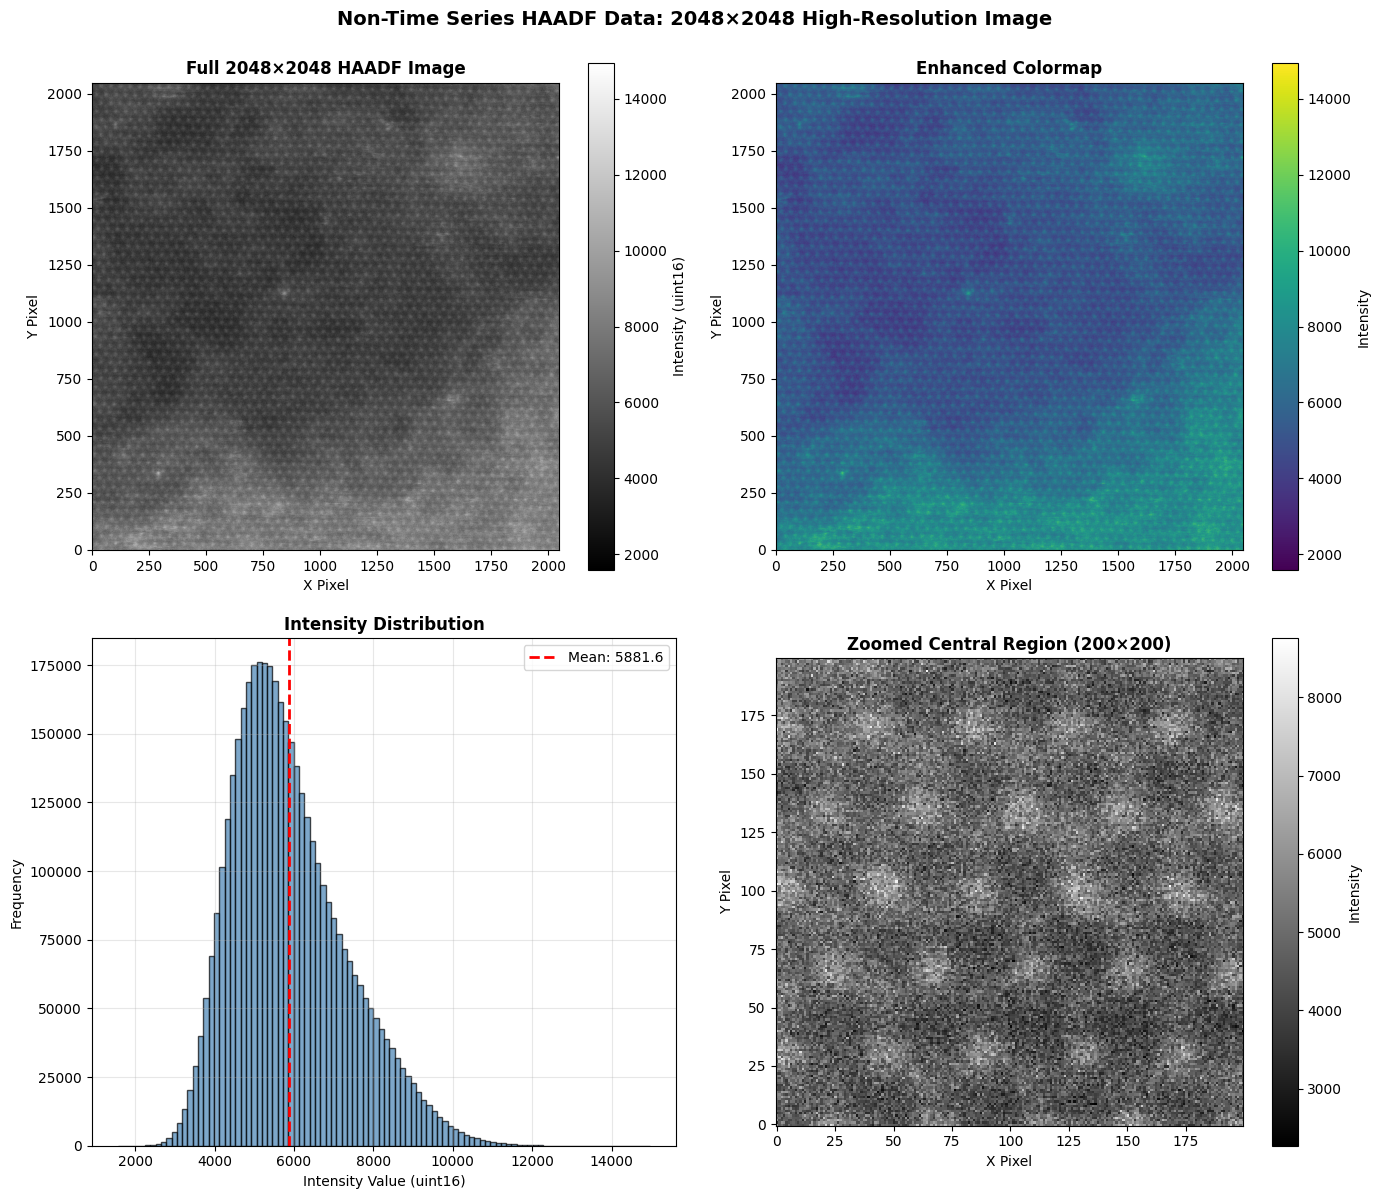


Visualization complete: High-resolution 2048×2048 HAADF image


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

im1 = axes[0, 0].imshow(haadf_image, cmap='gray', origin='lower')
axes[0, 0].set_title('Full 2048×2048 HAADF Image', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('X Pixel')
axes[0, 0].set_ylabel('Y Pixel')
plt.colorbar(im1, ax=axes[0, 0], label='Intensity (uint16)')

im2 = axes[0, 1].imshow(haadf_image, cmap='viridis', origin='lower')
axes[0, 1].set_title('Enhanced Colormap', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('X Pixel')
axes[0, 1].set_ylabel('Y Pixel')
plt.colorbar(im2, ax=axes[0, 1], label='Intensity')

axes[1, 0].hist(haadf_image.flatten(), bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Intensity Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Intensity Value (uint16)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axvline(np.mean(haadf_image), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {np.mean(haadf_image):.1f}')
axes[1, 0].legend()

zoom_size = 200
zoom_start = 1024 - 100
zoomed = haadf_image[zoom_start:zoom_start+zoom_size, zoom_start:zoom_start+zoom_size]
im4 = axes[1, 1].imshow(zoomed, cmap='gray', origin='lower', interpolation='nearest')
axes[1, 1].set_title(f'Zoomed Central Region ({zoom_size}×{zoom_size})', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('X Pixel')
axes[1, 1].set_ylabel('Y Pixel')
plt.colorbar(im4, ax=axes[1, 1], label='Intensity')

plt.suptitle('Non-Time Series HAADF Data: 2048×2048 High-Resolution Image', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\nVisualization complete: High-resolution 2048×2048 HAADF image")

## Summary: Non-Time Series vs Time Series Data

### Non-Time Series Data (`HAADF.h5`)

**Structure:**
- Single snapshot (no temporal evolution)
- 1 measurement: `Measurement_000`
- Group path: `Measurement_000/Channel_000/HAADF/HAADF`

**Image Characteristics:**
- **Resolution:** 2048×2048 pixels (4× more pixels than time series)
- **Data type:** `uint16` (16-bit unsigned integer)
- **Value range:** 1,217 to 11,882
- **Mean intensity:** 4,406.34
- **Std deviation:** 927.52
- **Coordinate arrays:** x and y (2048 points each, float64)

**Quality Assessment:**
- Higher spatial resolution → better for atomic-scale feature detection
- Integer format → raw detector counts (less processing)
- Clear hexagonal lattice structure visible in zoomed region
- Good contrast and relatively low noise

---